# 회귀 성능 지표

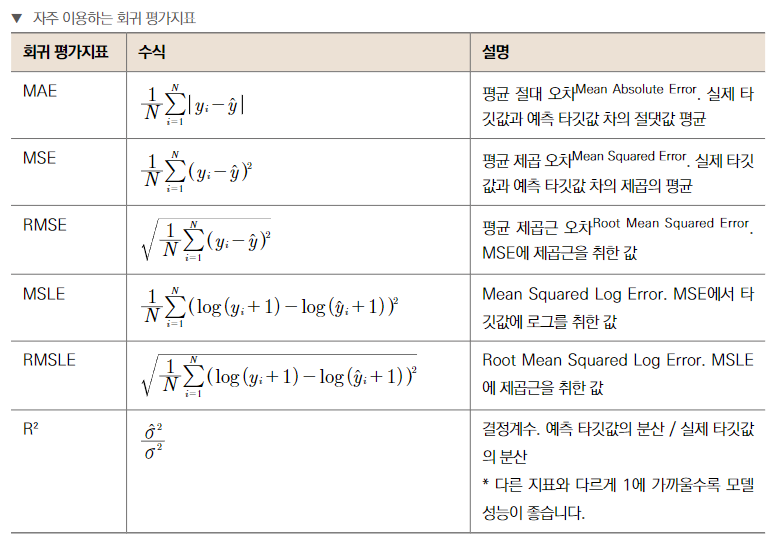

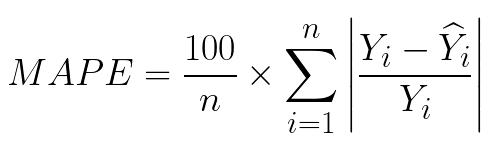

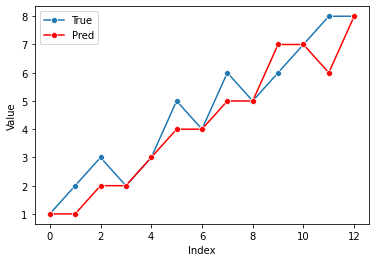

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# MAE, MSE, MSLE, R2 임포트
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error

true = np.array([1, 2, 3, 2, 3, 5, 4, 6, 5, 6, 7, 8, 8]) # 실제값
preds = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7, 6, 8]) # 예측값

df = pd.DataFrame(data={"True":true, "Pred":preds})
sns.lineplot(data=df, x=df.index, y="True", ci=False, marker="o", label="True")
sns.lineplot(data=df, x=df.index, y="Pred", color="r", ci=False, marker="o", label="Pred")

plt.legend()
plt.ylabel("Value")
plt.xlabel("Index")
plt.show()

In [9]:
MAE = mean_absolute_error(true, preds)
MSE = mean_squared_error(true, preds)
RMSE = np.sqrt(MSE)
MSLE = mean_squared_log_error(true, preds)
RMSLE = np.sqrt(mean_squared_log_error(true, preds))
R2 = r2_score(true, preds)
MAPE = mean_absolute_percentage_error(true, preds)

# 출력
print(f'MAE:\t {MAE:.4f}')
print(f'MSE:\t {MSE:.4f}')
print(f'RMSE:\t {RMSE:.4f}')
print(f'MSLE:\t {MSLE:.4f}')
print(f'RMSLE:\t {RMSLE:.4f}')
print(f'R2:\t {R2:.4f}')
print(f'MAPE:\t {MAPE*100:.4f}%')

MAE:	 0.5385
MSE:	 0.6923
RMSE:	 0.8321
MSLE:	 0.0296
RMSLE:	 0.1721
R2:	 0.8617
MAPE:	 12.4359%


피어슨 상관계수: 0.9461773474589757
p-value: 1.0055145622055237e-06


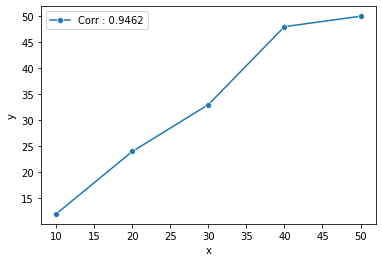

In [17]:
from scipy.stats import pearsonr

# 임의의 데이터 생성
x = np.array([10, 20, 30, 40, 50])
y = np.array([12, 24, 33, 48, 50])

# 피어슨 상관계수 계산
corr, p_value = pearsonr(true, preds)

sns.lineplot(x=x, y=y, ci=False, marker="o", label=f"Corr : {corr:.4f}")
plt.xlabel("x")
plt.ylabel("y")

# 결과 출력
print(f"피어슨 상관계수: {corr}")
print(f"p-value: {p_value}")

## 깜짝 퀴즈

회사에서 회귀 문제로 불량율 예측을 하던 최우재는 어느 날, 만들어 놓은 모델을 새롭게 얻은 데이터를 이용하여 평가할 일이 생겼다.

평가를 진행한 결과 충격적이게도 R2가 -0.07이 나온 것을 발견했다.

학부생 시절 통계학 수업에서 R2는 0~1 사이의 값을 가진다고 배운 최우재는 큰 혼란이 오며
이 값이 어떻게 산출된 것인지 의문을 가지게 되었다.

이 값이 음수로 산출될 수 있었던 이유는?

#
R2 공식은 아래와 같다.

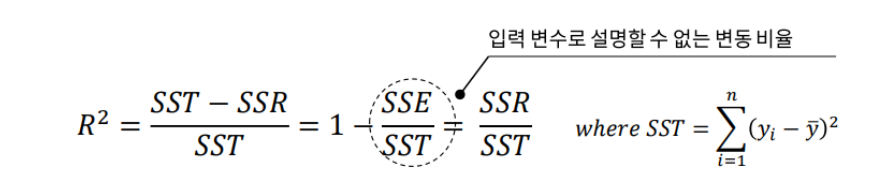

위 식이 성립하는 이유는 아래와 같다.

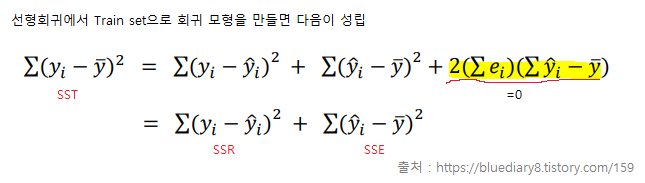

하지만 위 식은 Train set(학습데이터)에서만 성립하며, Test set(평가 데이터)에서는 성립하지 않는다.

다시 말하면, 잔차의 합 = 0이 성립하지 않기 때문에 SST = SSR + SSE + Test error 되므로 R2 = 1 - SSE/SST = (SSR+Test error)/SST

Test error에 따라 값이 변하기 때문에 Test R2는 -무한대 ~ 무한대의 값을 가질 수 있다.

# 분류 성능 지표

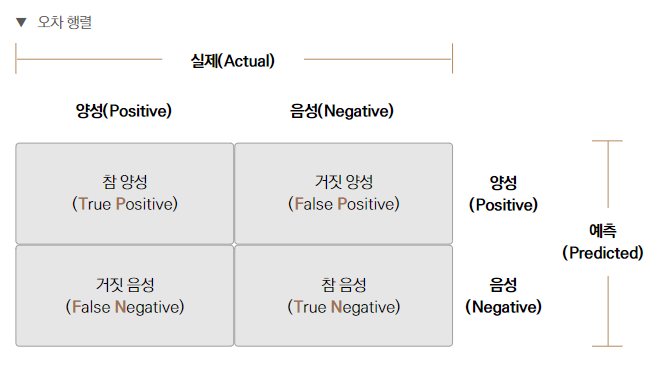

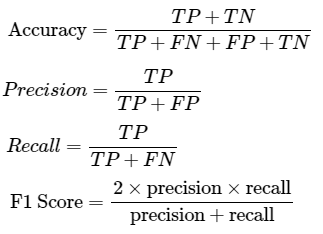
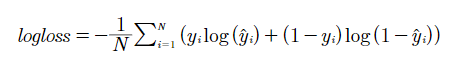

# AUROC

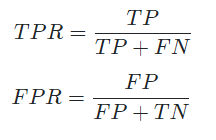

ROC는 target으로 예측한 확률 값을 이용하여 Threshold를 조절해가면서 분류할 때 FPR과 TRP의 변화를 보는 곡선이다.

AUROC는 ROC의 밑 면적을 의미한다.(0~1의 값을 가진다.)

,FPR,TPR,Threshold
0,0.000000,0.000000,inf
1,0.000000,0.333333,0.9
2,0.000000,0.666667,0.7
3,0.333333,1.000000,0.2
4,1.000000,1.000000,0.0


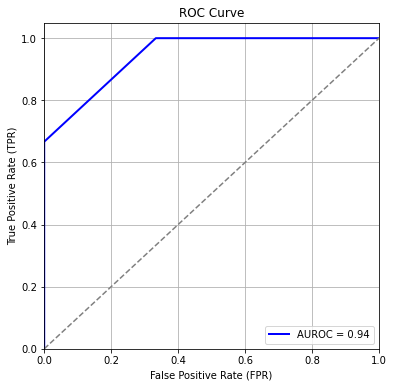

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# 예시 데이터 (실제 값 및 예측 확률)
y_true = np.array([1, 0, 1, 0, 1, 0])
y_pred = np.array([0.9, 0.1, 0.2, 0, 0.7, 0.2])

# AUROC 계산
auroc = roc_auc_score(y_true, y_pred)

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# ROC 데이터 프레임
df_roc = pd.DataFrame(data={"FPR":fpr, "TPR":tpr, "Threshold":thresholds})
display(df_roc)

# ROC 곡선 그리기
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUROC = {auroc:.2f}', color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 무작위 예측의 대각선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 레이블 인코딩과 원-핫 인코딩

In [12]:
from sklearn.preprocessing import LabelEncoder

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과', "Unknown"]


#레이블 인코더 생성
label_encoder = LabelEncoder()

#레이블 인코딩 적용
fruits_label_encoded = label_encoder.fit_transform(fruits)

print(fruits_label_encoded)

[3 2 1 0 2 1 1 3]


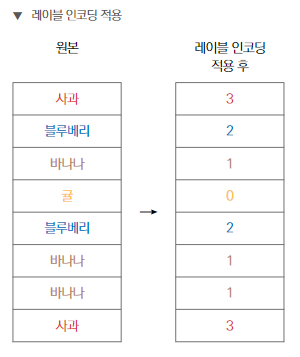

In [13]:
from sklearn.preprocessing import OneHotEncoder

#원핫 인코더 생성
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

#원핫 인코딩 적용
fruits_label_encoded = label_encoder.fit_transform(fruits)
fruits_onehot_encoded = onehot_encoder.fit_transform(fruits_label_encoded.reshape(-1,1))
#feature 이름 변경
feature_name = ["과일_귤", "과일_바나나", "과일_블루베리", "과일_사과"]
fruits_onehot_encoded.columns = feature_name
display(fruits_onehot_encoded)

fruits_onehot_encoded_get_dummy = pd.get_dummies(fruits)
display(fruits_onehot_encoded_get_dummy)

,과일_귤,과일_바나나,과일_블루베리,과일_사과
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,1.0


,귤,바나나,블루베리,사과
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,0,0,0,1


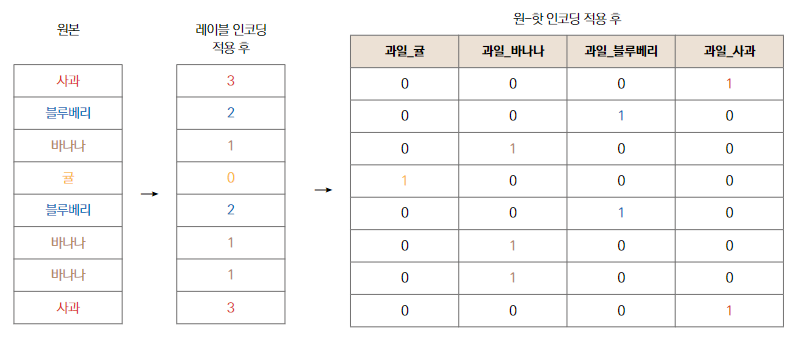

In [ ]:
fruits_2 = ['사과', '블루베리', "망고"]

#Error 발생
fruits_2_label_encoded = label_encoder.transform(fruits_2)
fruits_2_onehot_encoded = onehot_encoder.transform(fruits_2_label_encoded.reshape(-1,1))

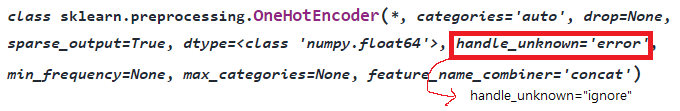

# 피처 스케일링

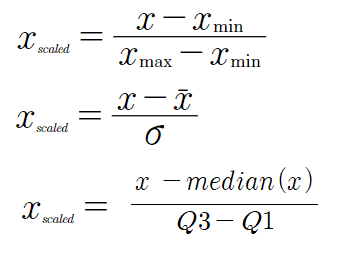

In [26]:
height_weight_dict = {"키" : [1.7, 1.5, 1.8], "몸무게" :[75,55,60]}
df = pd.DataFrame(height_weight_dict, index=["광일", "혜성", "덕수"])

display(df)

,키,몸무게
광일,1.7,75
혜성,1.5,55
덕수,1.8,60


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(df)
df_scaled = scaler.transform(df)

display(df_scaled)

scaler = MinMaxScaler( feature_range=(-1,1) ).set_output(transform="pandas")
scaler.fit(df)
df_scaled = scaler.transform(df)

display(df_scaled)

,키,몸무게
광일,0.666667,1.00
혜성,0.000000,0.00
덕수,1.000000,0.25


,키,몸무게
광일,0.333333,1.0
혜성,-1.000000,-1.0
덕수,1.000000,-0.5


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(df)
df_scaled = scaler.transform(df)

display(df_scaled)

,키,몸무게
광일,0.267261,1.372813
혜성,-1.336306,-0.980581
덕수,1.069045,-0.392232


In [29]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(df)
df_scaled = scaler.transform(df)

display(df_scaled)

scaler = RobustScaler( quantile_range=(10.0, 90.0) ).set_output(transform="pandas")
scaler.fit(df)
df_scaled = scaler.transform(df)

display(df_scaled)

,키,몸무게
광일,0.000000,1.5
혜성,-1.333333,-0.5
덕수,0.666667,0.0


,키,몸무게
광일,0.000000,0.9375
혜성,-0.833333,-0.3125
덕수,0.416667,0.0000


# 교차 검증
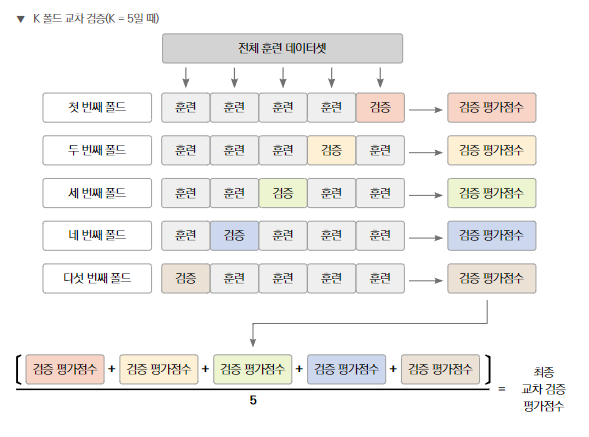|

In [19]:
from sklearn.model_selection import KFold

data = np.array([0,1,2,3,4,5,6,7,8,9])
#shuffle False
folds = KFold(n_splits=5, shuffle=False)

for train_idx, valid_idx in folds.split(data):
    print(f" 훈련 데이터 : {data[train_idx]}, 검증 데이터 : {data[valid_idx]}")

 훈련 데이터 : [2 3 4 5 6 7 8 9], 검증 데이터 : [0 1]
 훈련 데이터 : [0 1 4 5 6 7 8 9], 검증 데이터 : [2 3]
 훈련 데이터 : [0 1 2 3 6 7 8 9], 검증 데이터 : [4 5]
 훈련 데이터 : [0 1 2 3 4 5 8 9], 검증 데이터 : [6 7]
 훈련 데이터 : [0 1 2 3 4 5 6 7], 검증 데이터 : [8 9]


In [20]:
#shuffle True
folds = KFold(n_splits=5, shuffle=True)

for train_idx, valid_idx in folds.split(data):
    print(f" 훈련 데이터 : {data[train_idx]}, 검증 데이터 : {data[valid_idx]}")

 훈련 데이터 : [0 2 4 5 6 7 8 9], 검증 데이터 : [1 3]
 훈련 데이터 : [1 2 3 4 5 6 7 9], 검증 데이터 : [0 8]
 훈련 데이터 : [0 1 2 3 5 6 8 9], 검증 데이터 : [4 7]
 훈련 데이터 : [0 1 3 4 6 7 8 9], 검증 데이터 : [2 5]
 훈련 데이터 : [0 1 2 3 4 5 7 8], 검증 데이터 : [6 9]


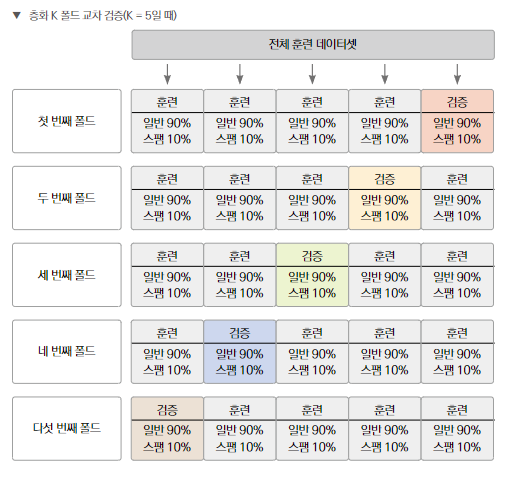

In [21]:
y = np.array(["스팸"]* 5 + ["일반"] * 45)

folds = KFold(n_splits=5, shuffle=True)

for idx, (train_idx, valid_idx) in enumerate(folds.split(y)):
    print(f"Fold {idx+1} 검증 데이터 타깃값:")
    print(y[valid_idx], "\n")

Fold 1 검증 데이터 타깃값:
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃값:
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃값:
['스팸' '스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃값:
['스팸' '스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



In [22]:
from sklearn.model_selection import StratifiedKFold

x = np.arange(50)
y = np.array(["스팸"]* 5 + ["일반"] * 45)

folds = StratifiedKFold(n_splits=5)

for idx, (train_idx, valid_idx) in enumerate(folds.split(x,y)):
    print(f"Fold {idx+1} 검증 데이터 타깃값:")
    print(y[valid_idx], "\n")

Fold 1 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



# 단순 선형 회귀 모델

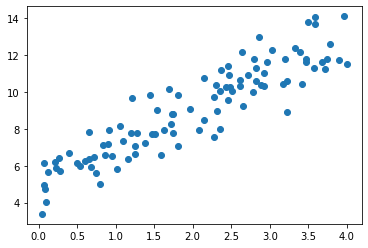

In [32]:
import matplotlib.pyplot as plt

np.random.seed(0)

w0 = 5
w1 = 2
noise = np.random.randn(100, 1)

x = 4 * np.random.rand(100,1)
y = w1*x + w0 + noise

plt.scatter(x, y)
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(x,y)

print(f"y절편(w0) : {linear_reg_model.intercept_}")
print(f"계수(w1) : {linear_reg_model.coef_[0]}")

y절편(w0) : [5.09772262]
계수(w1) : [1.9808382]


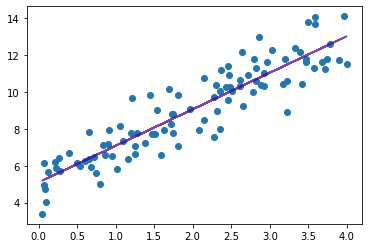

In [35]:
y_pred_1 = linear_reg_model.intercept_ + linear_reg_model.coef_[0] * x
y_pred_2 = linear_reg_model.predict(x)

plt.scatter(x,y)
plt.plot(x, y_pred_1, color = "r", alpha = 0.5)
plt.plot(x, y_pred_2, color = "b", alpha = 0.5)

# 로지스틱 회귀 모델
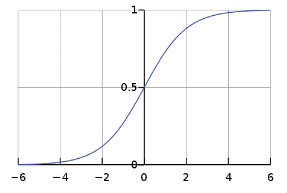

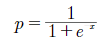

In [36]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action='ignore')

# 데이터프레임 생성
data = {
    'Age': [25, 30, 22, 35],
    'Income': [50000, 60000, 45000, 70000],
    'Website_Visits': [10, 15, 5, 20],
    'Purchased': [0, 1, 0, 1]
}
df = pd.DataFrame(data)

# 특성과 타겟 변수 분리
X = df[['Age', 'Income', 'Website_Visits']]
y = df['Purchased']

# 데이터 분할

# 로지스틱 회귀 모델 훈련
model = LogisticRegression()
model.fit(X, y)

print(f"y절편(w0) : {model.intercept_}")
print(f"계수(w) : {model.coef_}")

y절편(w0) : [-117.91541219]
계수(w) : [[0.00930838 0.00219371 0.00852226]]


In [37]:
# 새로운 데이터 예측
new_data = pd.DataFrame({"Age":22, "Income": 54000, "Website_Visits" : 15}, index=[0])  # 나이, 소득, 웹사이트 방문 횟수
probability = model.predict_proba(new_data)
prediction = model.predict(new_data)
print(f"구매 확률 : {probability[0][1]:.4f}, 구매 예측: {prediction[0]}")  # 0 또는 1 출력

구매 확률 : 0.7063, 구매 예측: 1


In [38]:
model.intercept_ 

array([-117.91541219])

In [40]:
model.coef_* np.array(new_data.loc[0])

array([[  0.20478447, 118.46010202,   0.12783387]])

In [41]:
def sigmoid(z):
    return 1/(1+np.exp(-np.sum(z)))

z = np.append(model.intercept_,  model.coef_* np.array(new_data.loc[0]))


print(f"확률 값 계산 : {sigmoid(z):.4f}")

확률 값 계산 : 0.7063


# 결정 트리
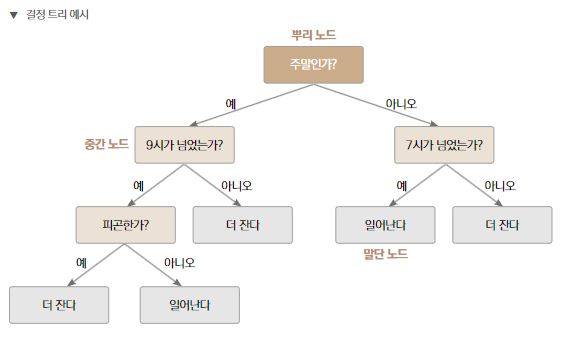

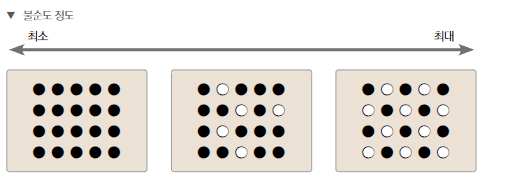

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer(as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(cancer_data["data"], cancer_data["target"], stratify=cancer_data["target"], test_size = 0.4, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

accuracy = dt.score(X_test, y_test)

print(f"결정 트리 정확도 : {accuracy:.3f}")

결정 트리 정확도 : 0.930


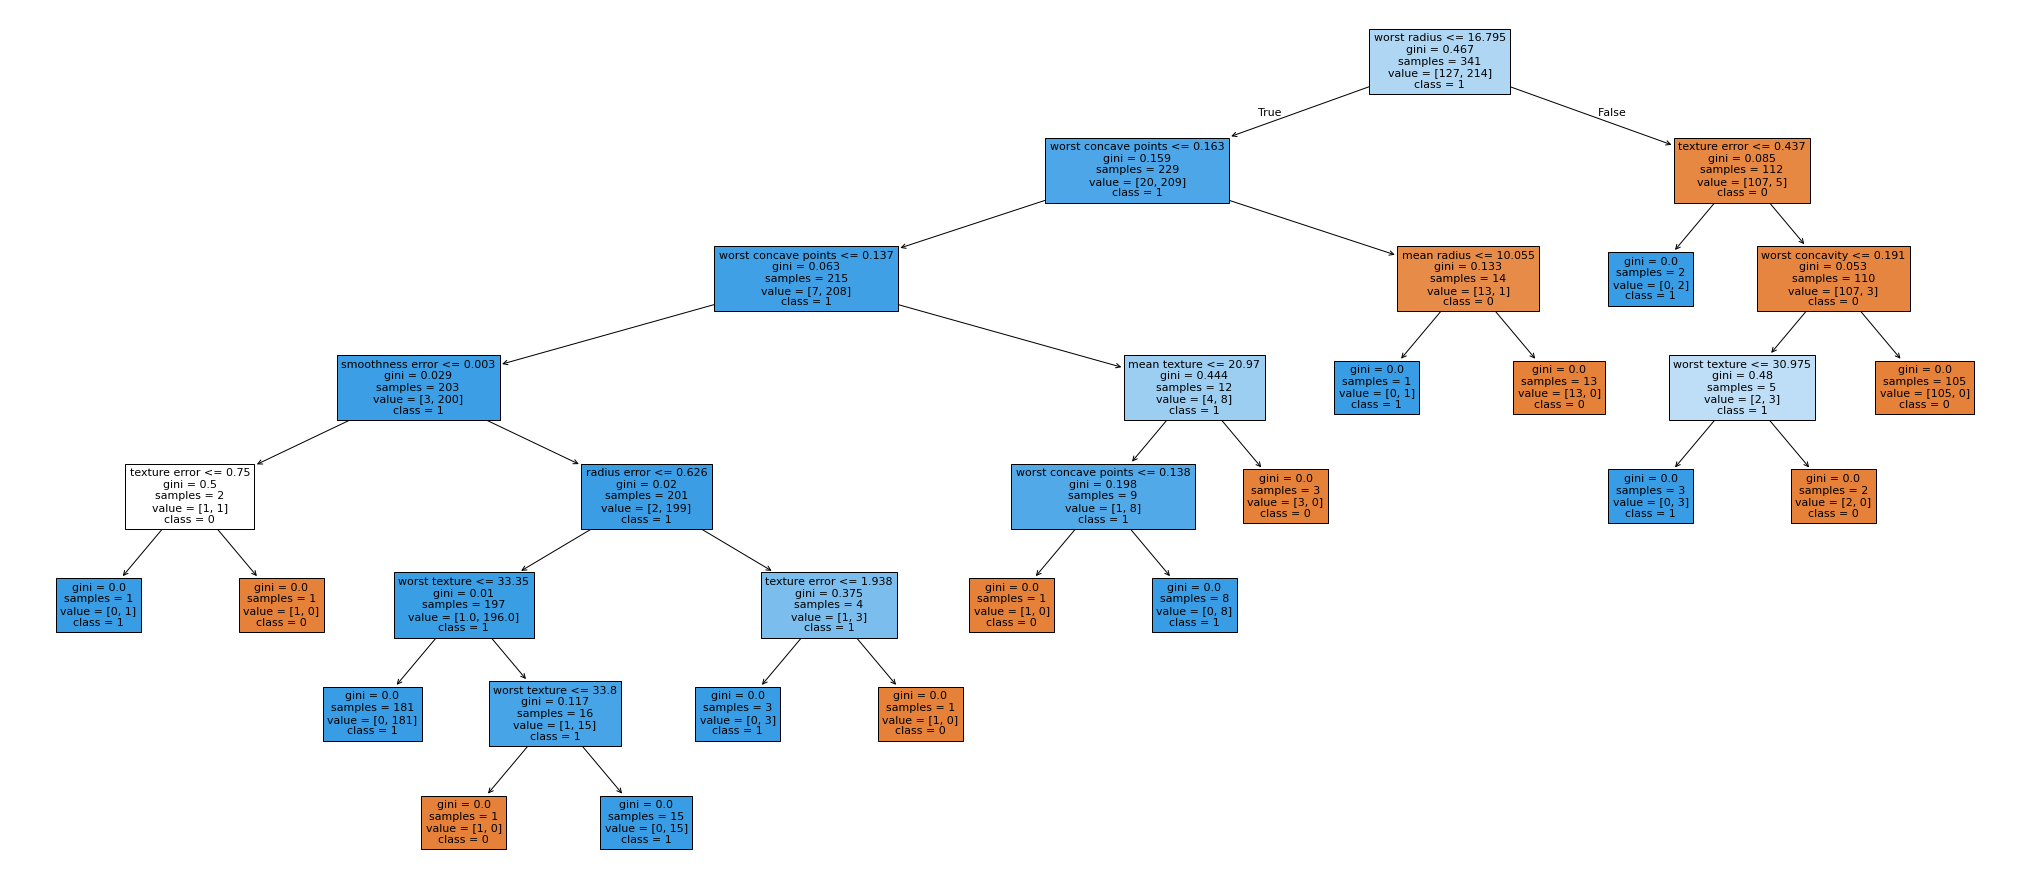

In [49]:
from sklearn import tree

fig = plt.figure(figsize=(36, 16))
tree_plot = tree.plot_tree(dt, feature_names=dt.feature_names_in_,
                  class_names=['0', '1'],
                  filled=True)

In [50]:
dt = DecisionTreeClassifier(max_depth=3, max_features=1, random_state=42)
dt.fit(X_train, y_train)

accuracy = dt.score(X_test, y_test)

print(f"결정 트리 정확도 : {accuracy:.3f}")

결정 트리 정확도 : 0.917


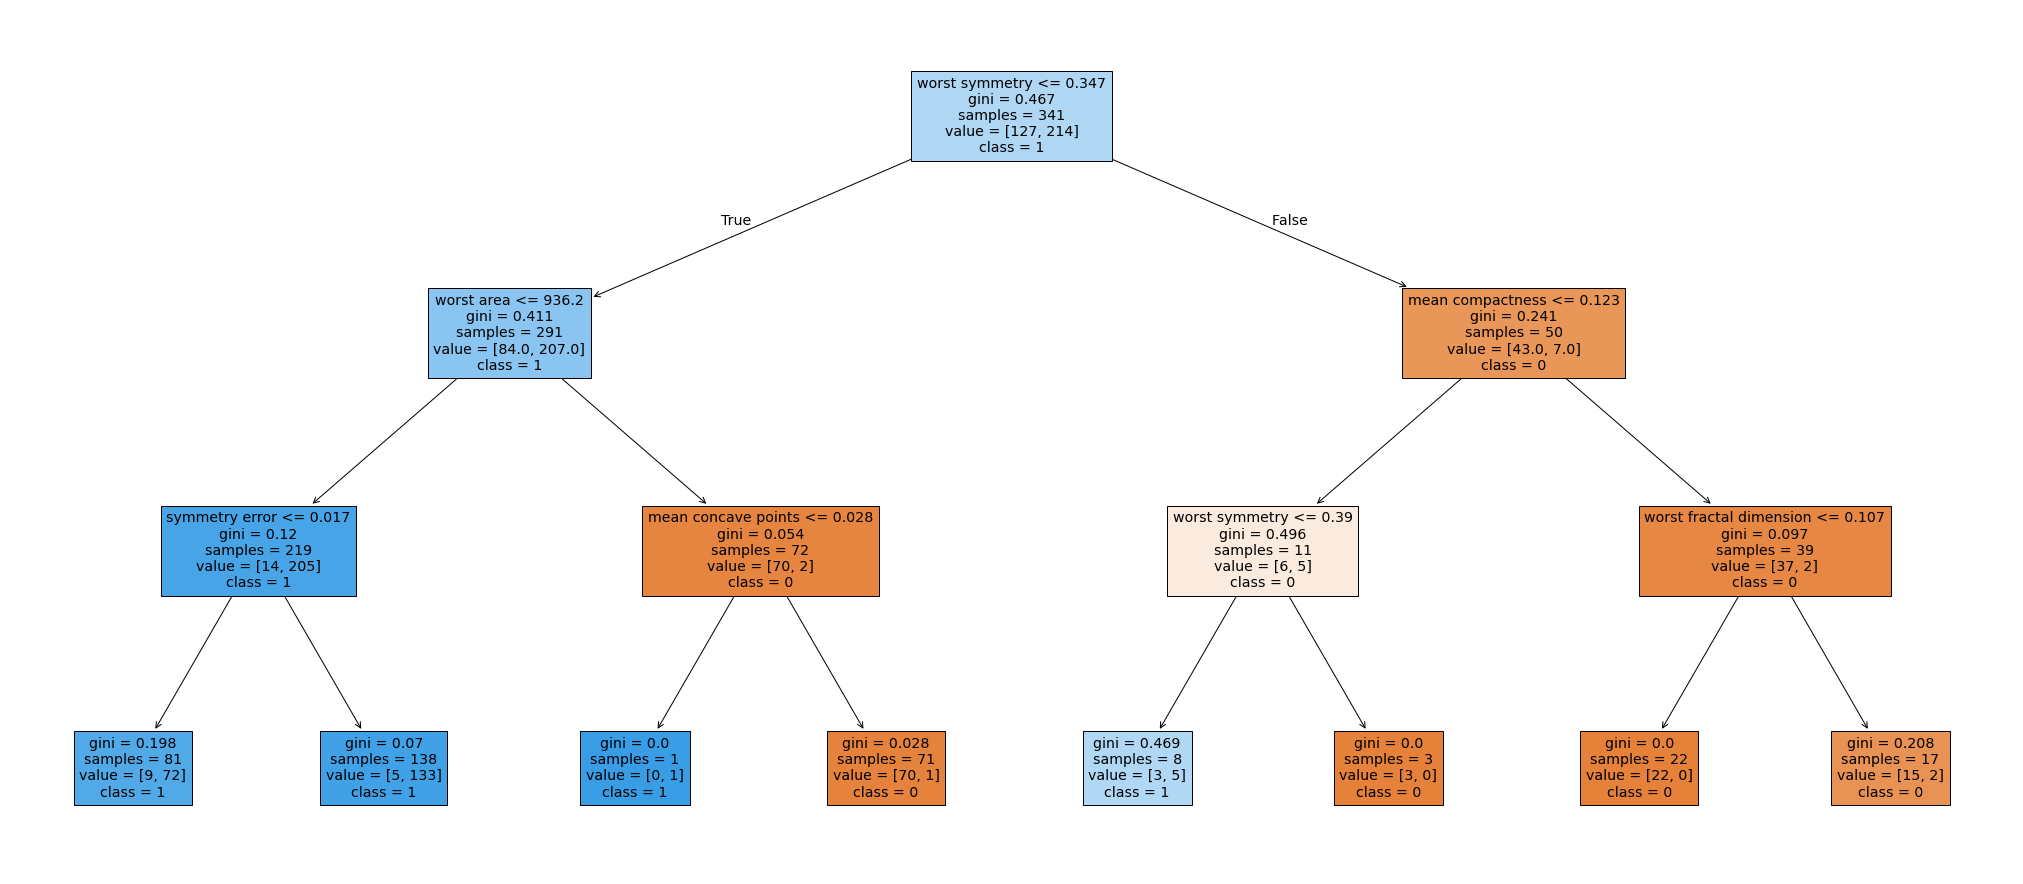

In [51]:
fig = plt.figure(figsize=(36, 16))
tree_plot = tree.plot_tree(dt, feature_names=dt.feature_names_in_,
                  class_names=['0', '1'],
                  filled=True)

# 랜덤 포레스트

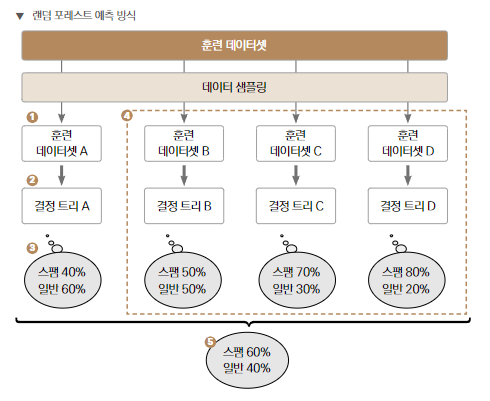

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer(as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(cancer_data["data"], cancer_data["target"], stratify=cancer_data["target"], test_size = 0.4, random_state=42)

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

accuracy = rf.score(X_test, y_test)

print(f"랜덤 포레스트 정확도 : {accuracy:.3f}")

랜덤 포레스트 정확도 : 0.947


# 랜덤 포레스트에는 적어도 몇개 정도의 Tree 개수를 확보하는게 좋을까?

How Many Trees in a Random Forest? 논문에 아래와 같은 실험 결과가 기재되어 있음.

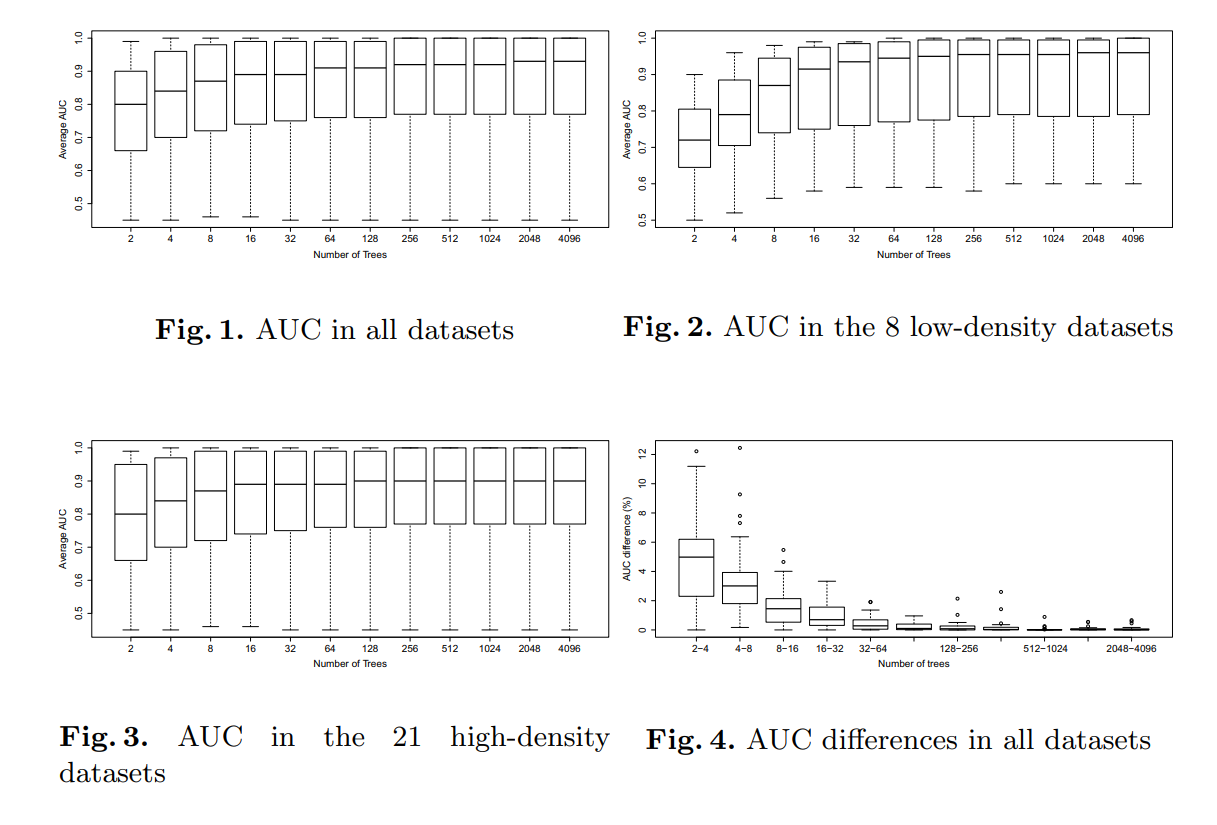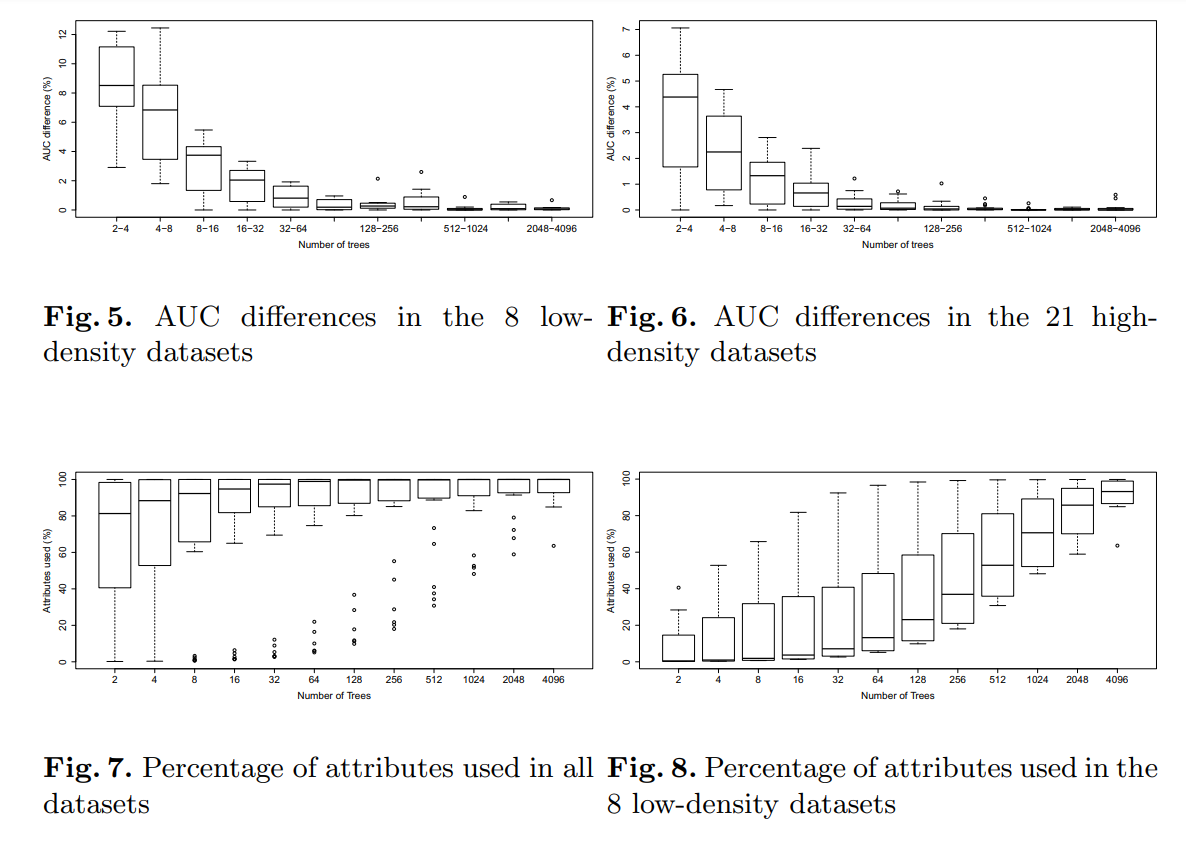

결론 : 적어도 64~128개 이상을 이용하면 보편적으로 기대되는 성능을 낼 수 있다

# 하이퍼 파라미터 최적화
* 그리드 서치 : 6장 설명 예정
* 랜덤 서치 : 그리드 서치와 매우 유사하지만 지정된 범위를 랜덤하게 탐색
* 베이지안 최적화 : 사전 정보를 바탕으로 하이퍼 파라미터 값을 확률적으로 추정하며 탐색

In [235]:
#pip install bayesian-optimization

In [59]:
from bayes_opt import BayesianOptimization

def eval_function(x, y):
    return -x ** 2 - (y - 2) ** 2 + 10

param_bounds = {'x' : (-1,5), 'y' : (0, 4)}

optimizer = BayesianOptimization(f=eval_function, pbounds=param_bounds, random_state=0)

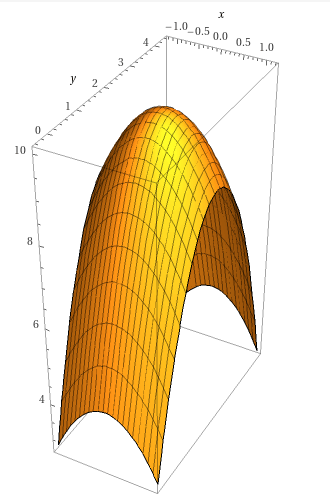

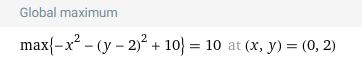

In [60]:
optimizer.maximize(init_points=2, n_iter=10)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | 4.002     | 2.293     | 2.861     |
| 2         | 3.121     | 2.617     | 2.18      |
| 3         | 3.832     | 2.327     | 2.869     |
| 4         | 4.604     | 2.164     | 2.845     |
| 5         | -6.227    | 3.989     | 2.559     |
| 6         | 9.525     | 0.3424    | 1.401     |
| 7         | 7.083     | -0.9957   | 3.388     |
| 8         | 5.258     | -0.9848   | 0.05778   |
| 9         | 3.969     | 1.461     | 0.02633   |
| 10        | 8.989     | -0.9926   | 1.841     |
| 11        | 9.734     | 0.1835    | 2.482     |
| 12        | 5.856     | 0.482     | 3.978     |


In [61]:
optimizer.maximize(init_points=2, n_iter=100)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 13        | 7.282     | 1.542     | 2.584     |
| 14        | 4.902     | 1.626     | 3.567     |
| 15        | 9.965     | -0.1683   | 1.918     |
| 16        | 9.754     | 0.4951    | 1.97      |
| 17        | 9.801     | -0.3238   | 2.307     |
| 18        | 9.996     | 0.05443   | 2.038     |
| 19        | 9.961     | 0.05686   | 1.81      |
| 20        | 9.996     | -0.05645  | 2.031     |
| 21        | 9.998     | -0.005553 | 1.958     |
| 22        | 9.993     | -0.004069 | 2.086     |
| 23        | 10.0      | 0.003335  | 1.985     |
| 24        | 9.999     | -0.01782  | 1.967     |
| 25        | 9.998     | 0.03717   | 1.988     |
| 26        | 10.0      | -0.01666  | 2.001     |
| 27        | 9.998     | 0.03763   | 1.98      |
| 28        | 10.0      | -0.01898  | 2.003     |
| 29        | 9.999     | -0.03507  | 2.005     |
| 30        | 10.0      | 0.01616   | 1.996     |


In [62]:
print(optimizer.max)

{'target': 9.999982383923015, 'params': {'x': -0.004190468677028214, 'y': 1.9997632527700437}}
